## Описание датафрейма 

В качестве набора данных мы используем "Популярные песни ТикТока 2022г."
https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2022

Этот набор данных предоставляет всю важную информацию, которая может потребоваться для дальнейшего анализа, начиная с базовых знаний, таких как название трека и имя исполнителя, заканчивая самыми продвинутыми сведениями, такими как темп, time_signature и т.д. и т.п.

Проанализировав статистику по тикток-песням, можно получить данные об особенностях медиакультуры молодёжи.
Датасет представлен файлом TikTok_songs_2022.csv
В наборе содержатся следующие поля:
1)	track_name – название трека,
2)	artist_name – псевдоним исполнителя,
3)	artist_pop – популярность исполнителя,
4)	album – название альбома,
5)	track_pop – популярность трека,
6)	danceability – зажигательность,
7)	energy – энергичность,
8)	loudness – громкость (дБ),
9)	mode – лад (мажор/минор),
10)	key – тональность, 
11)	speechiness – речь,
12)	acousticness – акустика,
13)	instrumentalness – инструментальность,
14)	liveness – живость,
15)	valence – настроение,
16)	tempo – темп, 
17)	time_signature – размер такта,
18)	duration_ms – длительность (мс).

Анализ статистических данных о музыкальных произведениях Тиктока позволяет прийти к некоторым выводам и применять их в следующих целях:
-	оценка музыкальных предпочтений аудитории Тиктока;
-	предсказание популярности новых треков;
-	продвижение существующих треков;
-	разработка музыкальных произведений, рассчитанная на достижение наибольшего успеха;
-	создание видео, набирающих большие просмотры.




## Загрузка библиотек и датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as ex

In [2]:
df = pd.read_csv('TikTok_songs_2022.csv')

## Получение общей информации о датасете

In [3]:
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [9]:
# Размер датасета - 263 строки, 18колонок
df.shape

(263, 18)

In [10]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 263


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [12]:
# new_df=df.copy()

# for col in df.select_dtypes(include=['object']).columns:
#     new_df[col]=new_df[col].astype('string')
    
# for col in df.select_dtypes(include=['float64']).columns:
#     new_df[col]=new_df[col].astype('float16')
    
# for col in df.select_dtypes(include=['int64']).columns:
#     new_df[col]=new_df[col].astype('int16')
    
# df=new_df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

### Проверка на пропуски и дубликаты

In [14]:
df.isna().sum().sum()

0

In [15]:
df.duplicated().sum()

0

Пропусков и дубликатов в датафрейме не обнаружено

### Получение общей информации о числовых данных датасета 

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_pop,263.0,64.186312,18.146338,18.000000,50.00000,64.000000,81.000000,95.000
track_pop,263.0,59.844106,24.976524,0.000000,47.00000,66.000000,79.500000,97.000
danceability,263.0,0.715338,0.117722,0.308000,0.64600,0.726000,0.796500,0.961
energy,263.0,0.682631,0.141756,0.214000,0.59300,0.701000,0.790500,0.955
loudness,263.0,-6.300513,1.905114,-13.468000,-7.42350,-6.067000,-4.887000,-2.634
mode,263.0,0.536122,0.499644,0.000000,0.00000,1.000000,1.000000,1.000
key,263.0,5.809886,3.657312,0.000000,2.00000,6.000000,9.000000,11.000
speechiness,263.0,0.117268,0.101417,0.025200,0.04475,0.070700,0.156000,0.481
acousticness,263.0,0.193188,0.214588,0.000038,0.02810,0.120000,0.298500,0.965
instrumentalness,263.0,0.020244,0.109370,0.000000,0.00000,0.000003,0.000334,0.939


Так как количество числовых данных велико, визуализируем их, чтобы понять зависимости, аномалии и тд

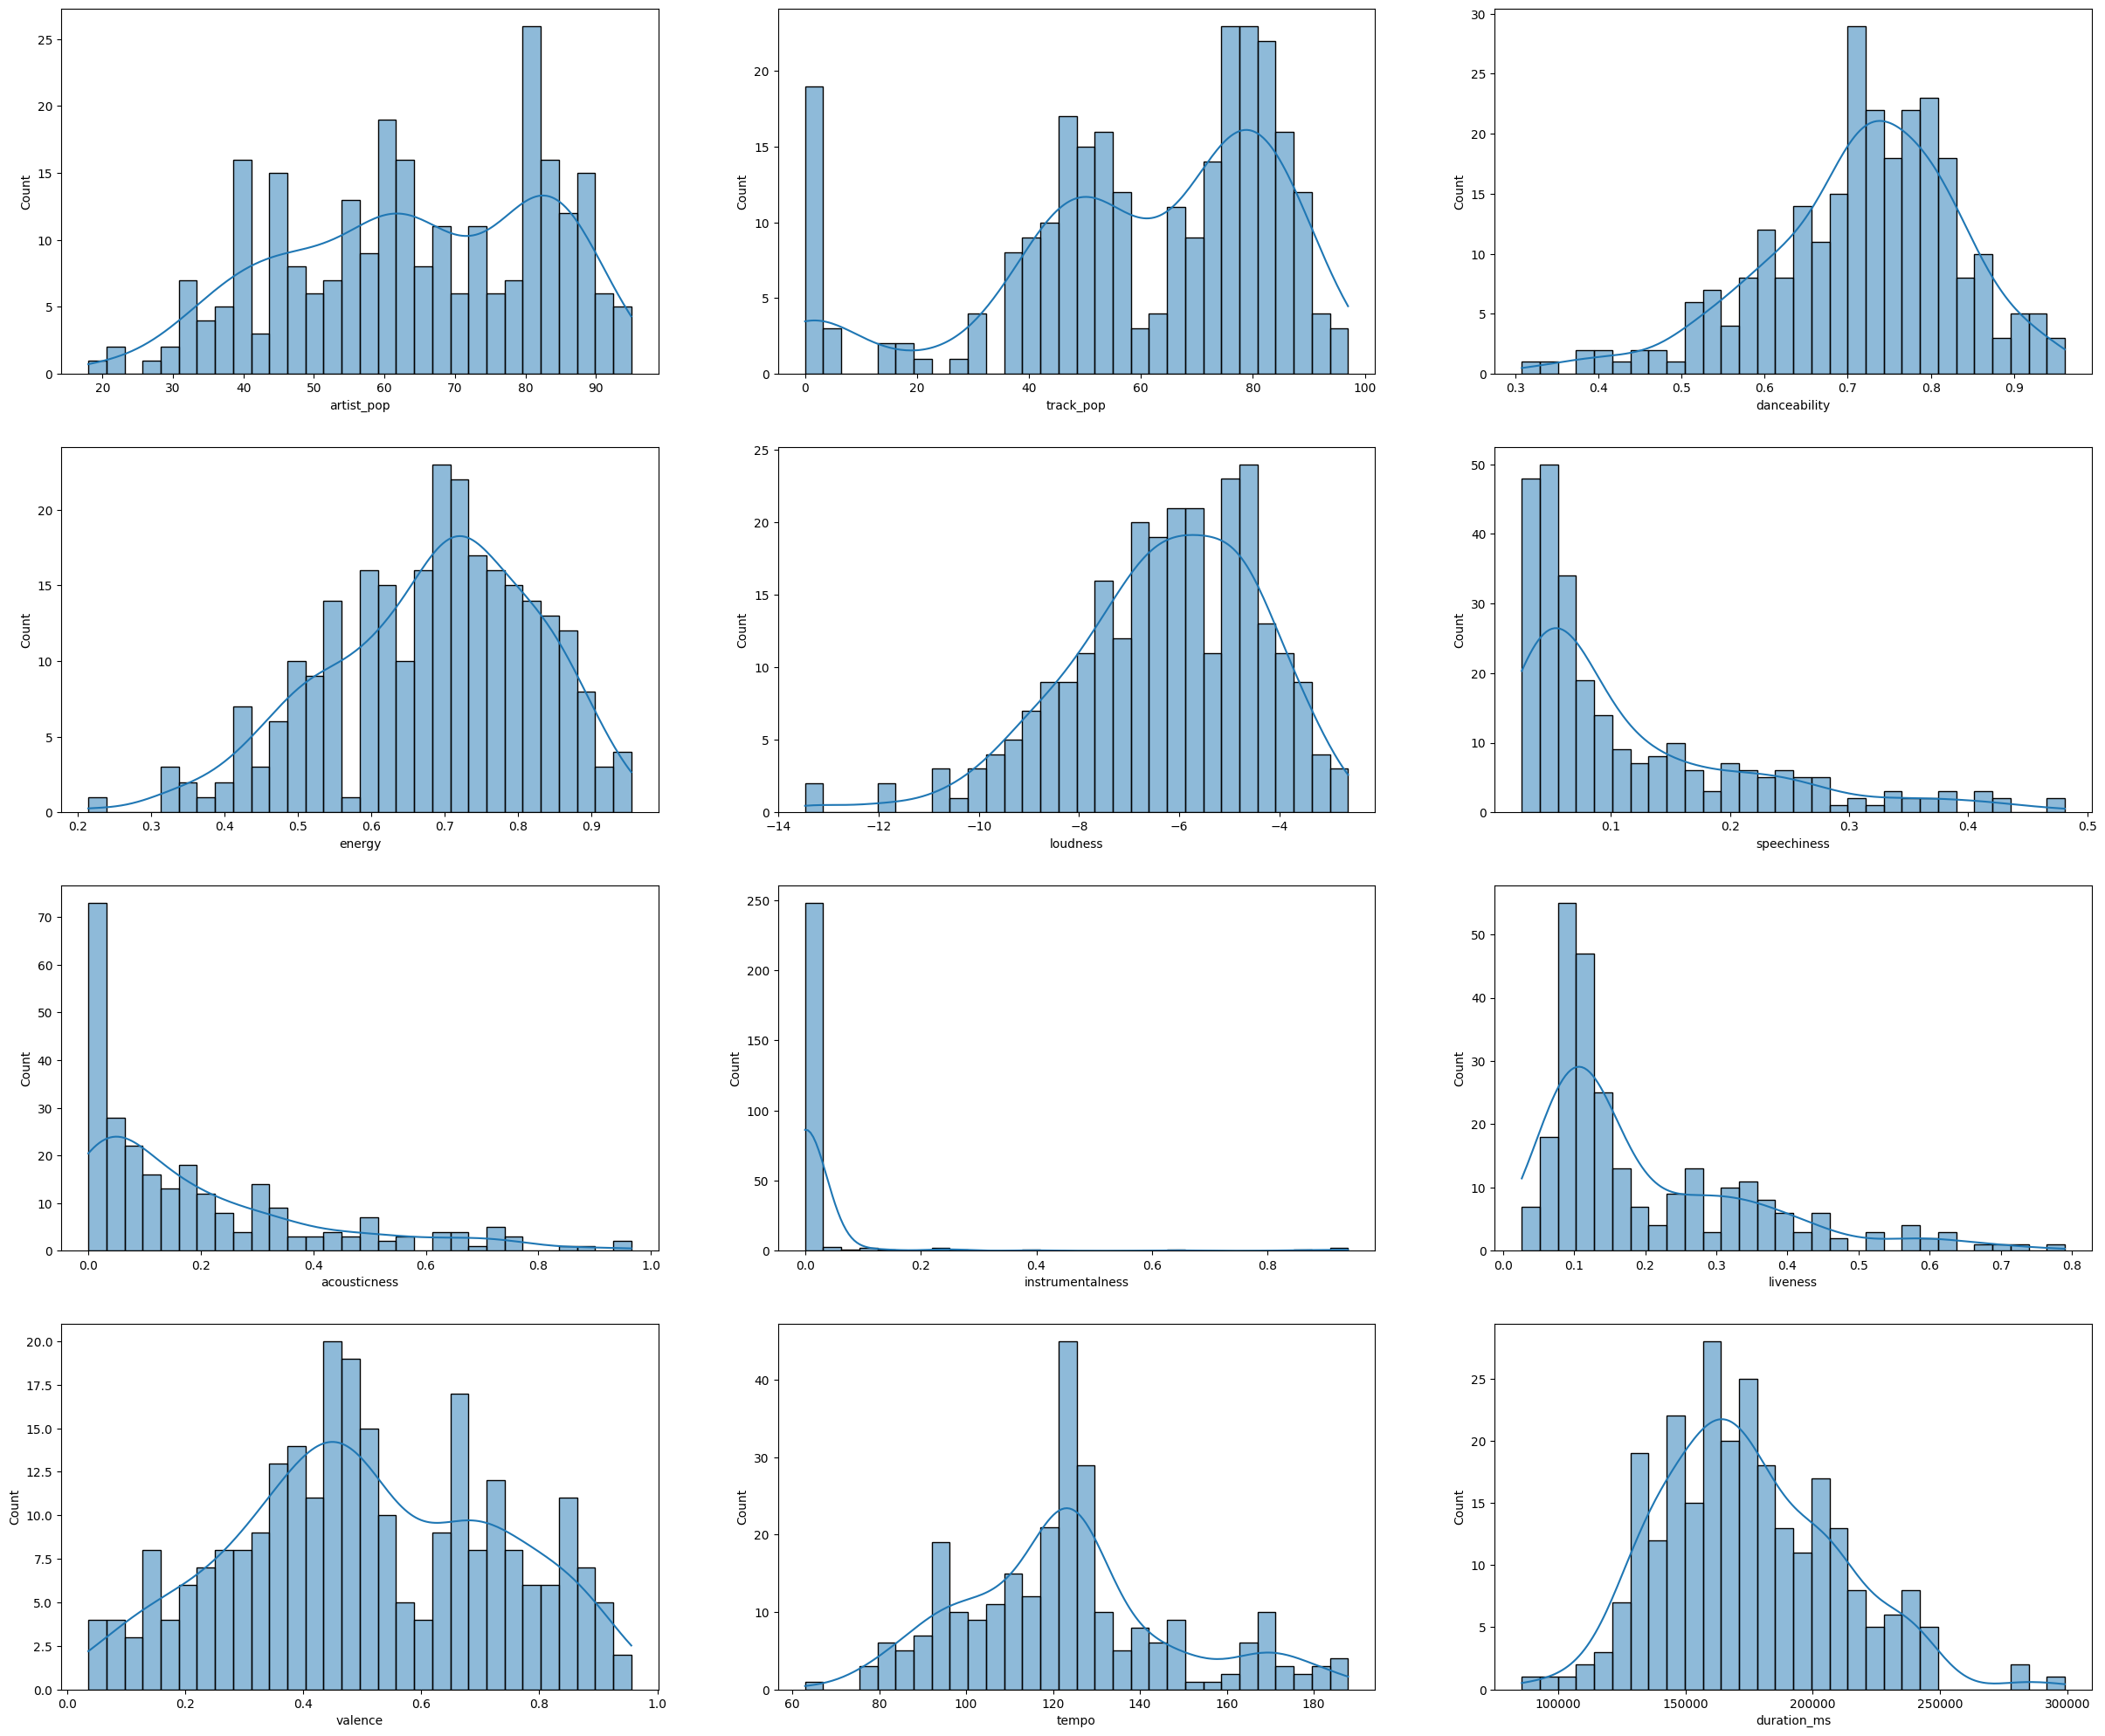

In [17]:
def hist(df, x, ax, bins=30):
    sns.histplot(data=df, x=x, bins=bins, ax=ax,kde=True)    

columns = ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(columns):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

plt.show()

В переменной 'track_pop', есть скачок на 0. Вероятно, это означает, что для таких треков у нас отсутствуют данные, которые нам придется либо исключить, либо заменить средним значением по столбцу.

"Громкость" - единственная функция с отрицательными значениями

"Инструментальность" имеет почти все значения в 0: из-за этого данный столбец не несет особой смысловой нагрузки, исключим его в дальшейем 

### Первая особенность: оценка трека имеет 0 значение

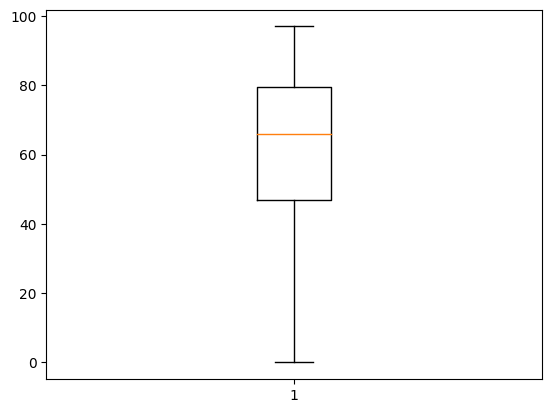

In [18]:
 plt.boxplot(df['track_pop']);

Видим, что Q1 и Q3 находятся в разрезе между 45 и 75 баллами, поэтому будем считать значения равные 0 - выбросами, посмотрим, какой их процент в датафрейме

In [19]:
df[['track_pop','track_name']].query('track_pop == 0')

,track_pop,track_name
16,0,AMG
32,0,Fever - Remix
42,0,Without You
68,0,Lost
75,0,Looking for Love
78,0,She Wolf (Falling to Pieces)
102,0,Buss It
130,0,Slow Down
131,0,What If
184,0,Backyard Boy


13 треков имеет рейтинг равный 0 - это не большой процент. Удалим эти данные

In [20]:
df = df.query('track_pop != 0')

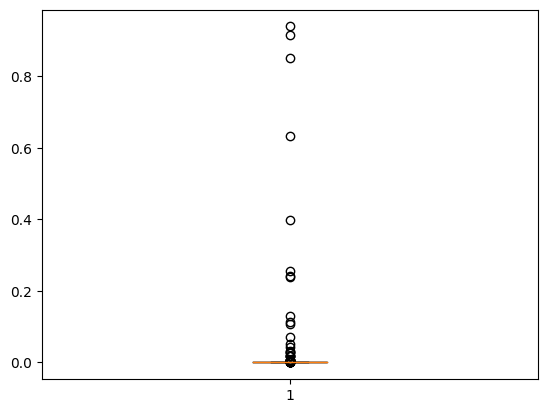

In [21]:
 plt.boxplot(df['instrumentalness']);

In [22]:
df[['instrumentalness','track_name']].query('instrumentalness >= 0.5')

,instrumentalness,track_name
112,0.633,Freaks
127,0.939,Write This Down (Instrumental)
132,0.852,Running Away
216,0.915,Astronomia


Да, действительно, видим, что 90% нашего датафрейма - вокальные треки, лишь 4 их них имеют порог выше 0.5, что говорит об инструментальности данных треков. Поэтому удалим данный столбец, тк выдвинуть гипотезы и анализировать данные с помощью него не получится

In [23]:
df.drop(columns = ['instrumentalness'],axis = 1, inplace=True)

## Визуализация

Построим тепловую карту, чтобы посмотреть корреляцию между переменными

C:\Users\user\AppData\Local\Temp\ipykernel_12412\4119497411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  m =np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\user\AppData\Local\Temp\ipykernel_12412\4119497411.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask = m,  annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');


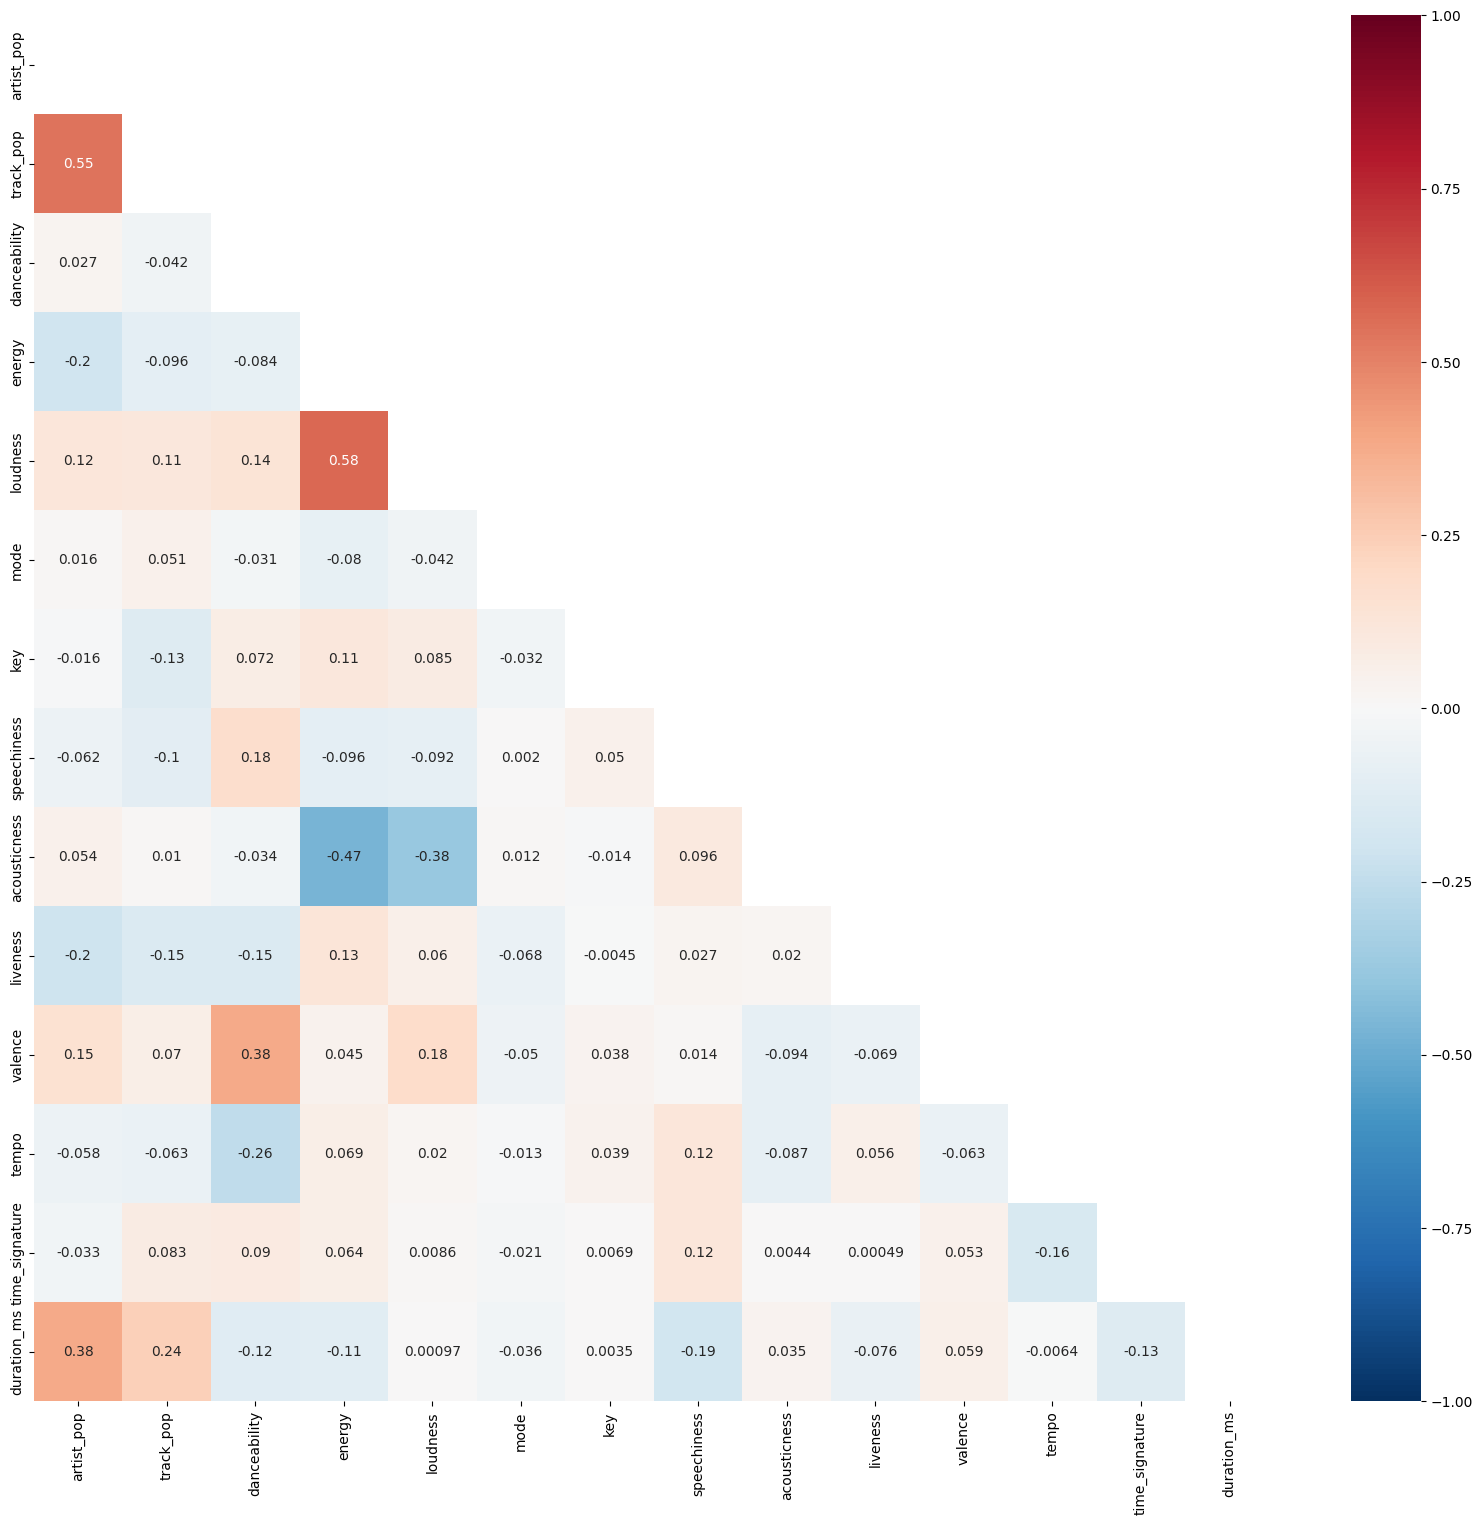

In [24]:
plt.figure(figsize = (20,18))

m =np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask = m,  annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');

Видим, что есть небольшая взаимосвязь у переменных: 

* популярность исполнителя и популярность исполнителя

* танцевальность и валентность

* энегичность и акустичность

* громкость и акустичность

* популярность исполнителя и продолжительность трека в миллисекундах

### Выявим топ-5 артистов

In [25]:

pop = df.drop_duplicates('artist_name').sort_values('artist_pop', ascending=False).head()


In [26]:
pop.artist_name.unique()

array(['Drake', 'The Weeknd', 'Harry Styles', 'Justin Bieber',
       'Ed Sheeran'], dtype=object)

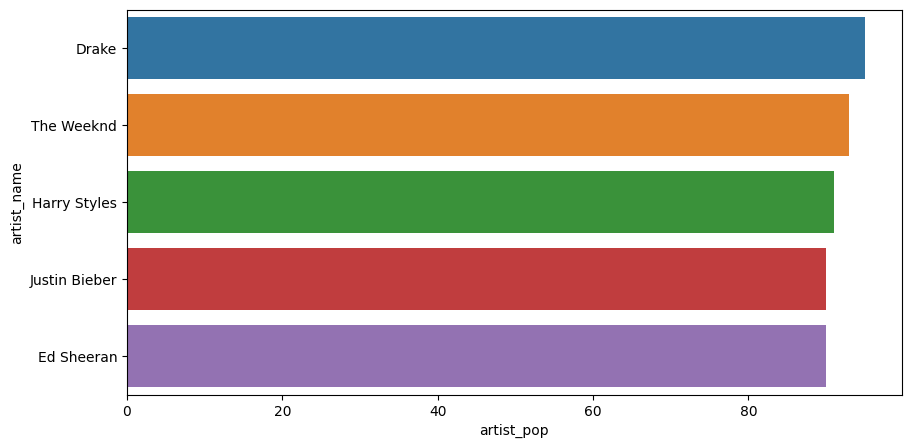

In [27]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'artist_name',x = 'artist_pop',data = pop);

Примерно у всех артистов одинаковый уровень оценки > 80. Посмотрим на топ альбомов у самых популярных артистов

In [28]:
#pop = df.sort_values('artist_pop', ascending=False).head()

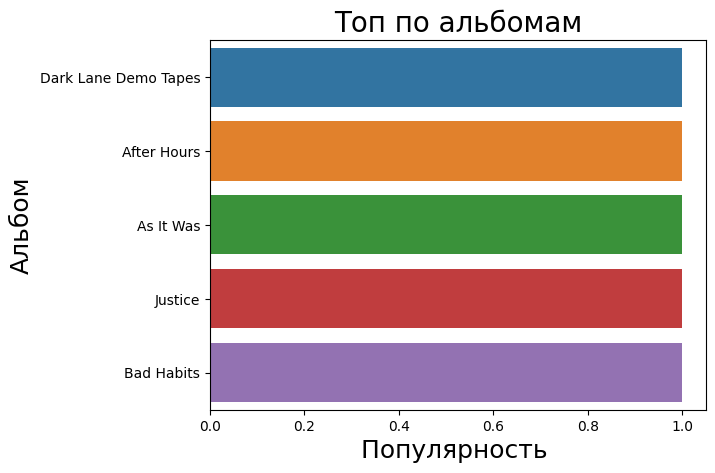

In [29]:
%matplotlib inline
plt.title('Топ по альбомам',fontsize=20)
sns.barplot(x=pop.album.value_counts().head(10),
            y=pop.album.value_counts().head(10).index)
plt.xlabel('Популярность ',fontsize=18)
plt.ylabel('Альбом',fontsize=18)
plt.show()

In [30]:
pop.album.value_counts()

Dark Lane Demo Tapes    1
After Hours             1
As It Was               1
Justice                 1
Bad Habits              1
Name: album, dtype: int64

Посмотрим на самые популярные треки топ5 артистов

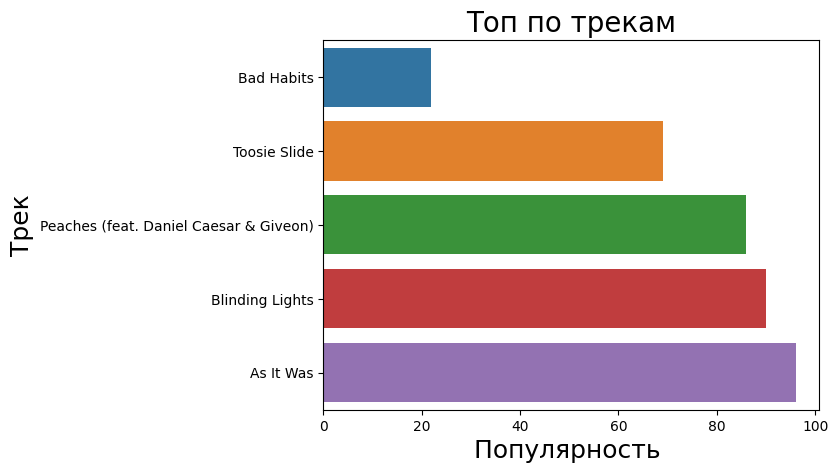

In [31]:
df_10 = pop.sort_values(by = 'track_pop' ).head(10)

%matplotlib inline
plt.title('Топ по трекам',fontsize=20)
sns.barplot(x=df_10.track_pop,
            y=df_10.track_name)
plt.xlabel('Популярность ',fontsize=18)
plt.ylabel('Трек',fontsize=18)
plt.show()

In [32]:
df_10.track_name.head(10)

48                                 Bad Habits
220                              Toosie Slide
128    Peaches (feat. Daniel Caesar & Giveon)
114                           Blinding Lights
1                                   As It Was
Name: track_name, dtype: object

Построим сводную таблицу по двум самым популярным артистам, чтобы посмотреть на выявить закономерность по числовым данным

In [33]:
table = pd.pivot_table(pop,
                       index=['artist_name','track_name'],
                       values=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'duration_ms'],
                       aggfunc='mean',
                       fill_value=0)
table = pd.DataFrame(table)

table

,,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness
artist_name,track_name,,,,,,,
Drake,Toosie Slide,0.28900,0.830,247059,0.490,0.1130,-8.820,0.2090
Ed Sheeran,Bad Habits,0.04690,0.808,231041,0.897,0.3640,-3.712,0.0348
Harry Styles,As It Was,0.34200,0.520,167303,0.731,0.3110,-5.338,0.0557
Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),0.32100,0.677,198082,0.696,0.4200,-6.181,0.1190
The Weeknd,Blinding Lights,0.00146,0.514,200040,0.730,0.0897,-5.934,0.0598


Видим, что
* danceability > 0.5135

* energy > 0.490

* loudness > -8.8200

* speechiness > 0.03460

* acousticness > 0.001465

* liveness > 0.07360

* duration_ms > 200806.5

Возможно - это формула успеха, посмотрим, как распределены данные у самых популярных артистов на платформе тикток 


### Гипотеза 1. Высокая прослушиваемость артистов не является показателем их популярности на Tiktok-платформе.

In [34]:
tik_tok = df['artist_name'].value_counts(ascending=False)

In [35]:
tik_tok = pd.DataFrame(tik_tok)

In [36]:
tik_tok.artist_name.head()

Doja Cat          8
Coopex            5
Dame Dame         5
Alex Alexander    4
Farux             4
Name: artist_name, dtype: int64

Как мы и предполагали, прослушиваемость артиста не гарантирует его популярность на платформе Тик Ток, как мы видим, что самое большое вхождение в данные у артистов Doja Cat, Coopex и Dame Dame. Гипотеза подтвердилась. Посмотрим зависимость данных

In [37]:
top = df.query('artist_name == "Doja Cat" | artist_name == "Coopex" | artist_name == "Dame Dame" | artist_name == "Alex Alexander" | artist_name == "Farux"')


Выявим самый популярный альбом и трек

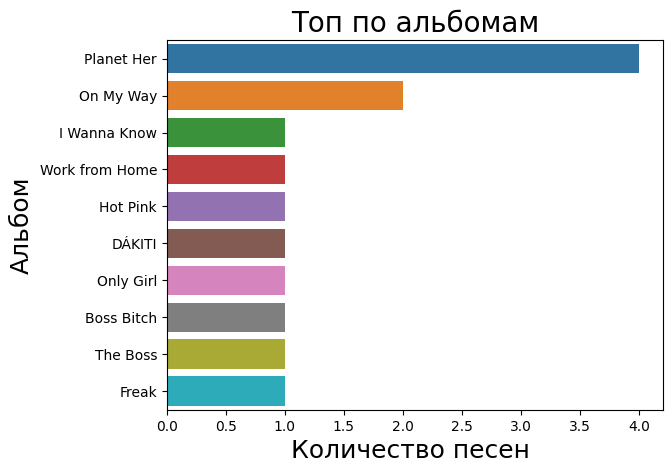

In [38]:
%matplotlib inline
plt.title('Топ по альбомам',fontsize=20)
sns.barplot(x=top.album.value_counts().head(10),
            y=top.album.value_counts().head(10).index)
plt.xlabel('Количество песен ',fontsize=18)
plt.ylabel('Альбом',fontsize=18)
plt.show()

In [39]:
top.album.value_counts().head(10)

Planet Her        4
On My Way         2
I Wanna Know      1
Work from Home    1
Hot Pink          1
DÁKITI            1
Only Girl         1
Boss Bitch        1
The Boss          1
Freak             1
Name: album, dtype: int64

In [40]:
top = top.sort_values(by = 'track_pop' )

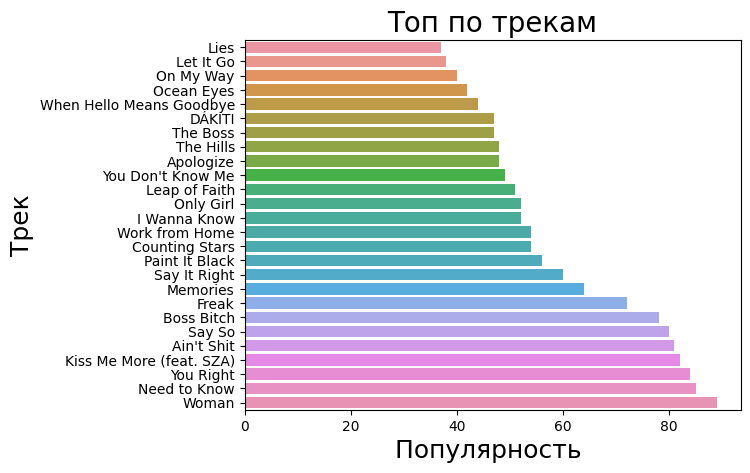

In [41]:
%matplotlib inline
plt.title('Топ по трекам',fontsize=20)
sns.barplot(x=top.track_pop.sort_values(),
            y=top.track_name)
plt.xlabel('Популярность ',fontsize=18)
plt.ylabel('Трек',fontsize=18)
plt.show()

In [42]:
top.track_name.unique()

array(['Lies', 'Let It Go', 'On My Way', 'Ocean Eyes',
       'When Hello Means Goodbye', 'DÁKITI', 'The Boss', 'The Hills',
       'Apologize', "You Don't Know Me", 'Leap of Faith', 'Only Girl',
       'I Wanna Know', 'Work from Home', 'Counting Stars',
       'Paint It Black', 'Say It Right', 'Memories', 'Freak',
       'Boss Bitch', 'Say So', "Ain't Shit", 'Kiss Me More (feat. SZA)',
       'You Right', 'Need to Know', 'Woman'], dtype=object)

In [43]:
data_pivot_category = df[['artist_name','track_name']]
data_pivot_category

table_pop = pd.pivot_table(top,
                       index=['artist_name','track_name'],
                       values=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'duration_ms'],
                       aggfunc='mean',
                       fill_value=0)
table_pop = pd.DataFrame(table_pop)

table_pop

acousticness  danceability  \
artist_name    track_name                                             
Alex Alexander I Wanna Know                   0.34800         0.772   
               Leap of Faith                  0.00924         0.557   
               On My Way                      0.04290         0.670   
               When Hello Means Goodbye       0.02140         0.741   
Coopex         Memories                       0.33500         0.745   
               Only Girl                      0.36700         0.792   
               Say It Right                   0.15200         0.712   
               The Boss                       0.08090         0.734   
               Work from Home                 0.18100         0.845   
Dame Dame      DÁKITI                         0.20600         0.726   
               Let It Go                      0.02790         0.769   
               Lies                           0.62700         0.823   
               Paint It Black                 0.04330         0.690   
               You Don't Know Me              0.03040         0.701   
Doja Cat       Ain't Shit                     0.50600         0.855   
               Boss Bitch                     0.12700         0.707   
               Freak                          0.09690         0.688   
               Kiss Me More (feat. SZA)       0.23500         0.762   
               Need to Know                   0.30400         0.664   
               Say So                         0.26400         0.787   
               Woman                          0.08880         0.824   
               You Right                      0.01640         0.828   
Farux          Apologize                      0.53200         0.677   
               Counting Stars                 0.50100         0.659   
               Ocean Eyes                     0.66800         0.729   
               The Hills                      0.40000         0.656   

                                         duration_ms  energy  liveness  \
artist_name    track_name                                                
Alex Alexander I Wanna Know                   149787   0.754    0.0784   
               Leap of Faith                  191080   0.802    0.5690   
               On My Way                      200840   0.544    0.0926   
               When Hello Means Goodbye       158160   0.475    0.3510   
Coopex         Memories                       138453   0.862    0.1020   
               Only Girl                      146465   0.832    0.1980   
               Say It Right                   128095   0.816    0.2400   
               The Boss                       133810   0.789    0.2150   
               Work from Home                 151680   0.669    0.0897   
Dame Dame      DÁKITI                         147367   0.815    0.6310   
               Let It Go                      130286   0.796    0.0871   
               Lies                           156885   0.771    0.2710   
               Paint It Black                 146190   0.741    0.0975   
               You Don't Know Me              157320   0.836    0.6350   
Doja Cat       Ain't Shit                     174253   0.488    0.3470   
               Boss Bitch                     134240   0.955    0.2020   
               Freak                          284480   0.716    0.0989   
               Kiss Me More (feat. SZA)       208867   0.701    0.1230   
               Need to Know                   210560   0.609    0.0926   
               Say So                         237893   0.673    0.0904   
               Woman                          172627   0.764    0.1170   
               You Right                      186173   0.621    0.0845   
Farux          Apologize                      129410   0.710    0.3370   
               Counting Stars                 144935   0.721    0.1090   
               Ocean Eyes                     137029   0.763    0.1470   
               The Hills                      129717  

Видим, что 
* danceability > 0.557

* energy > 0.475

* loudness > -7.886

* speechiness > 0.0252

* acousticness > 0.00924

* liveness > 0.0784

* duration_ms > 128095


### Сравним результаты по сводным таблицам:

* danceability > 0.5135

* energy > 0.490

* loudness > -8.8200

* speechiness > 0.03460

* acousticness > 0.001465

* liveness > 0.07360

* **duration_ms > 200806.5**
---------------------------
* danceability > 0.557

* energy > 0.475

* loudness > -7.886

* speechiness > 0.0252

* acousticness > 0.00924

* liveness > 0.0784

* **duration_ms > 128095**


Результаты почти равные, можно предположить, что данные цифры - это минимальные значение, по которым можно судить о популярности трека, единственный параметр, который сильно отличается это duration_ms

### Далее проведем статистические тесты для проверки гипотез. 
Чтобы провести тест необходимо перевести данные в категории. 

In [44]:
def cat_dance (df):
    if df['danceability'] < 0.5:
        return 0
    else:
        return 1
df['cat_dance'] = df.apply(cat_dance, axis = 1)

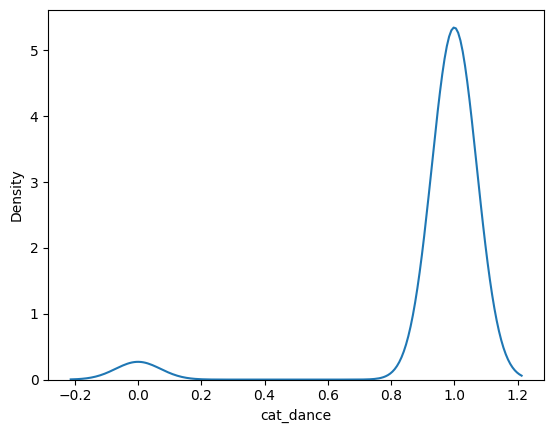

In [45]:
sns.kdeplot(df.cat_dance);

Большинство треков - танцевальные 

In [46]:
def enrg_dance (df):
    if df['energy'] < 0.6:
        return 0
    else:
        return 1
df['enrg_dance'] = df.apply(enrg_dance, axis = 1)

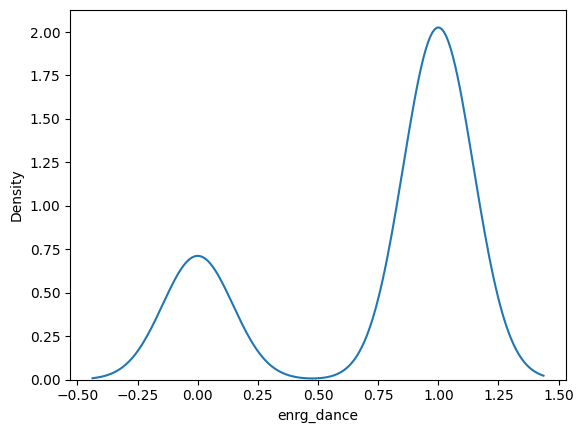

In [47]:
sns.kdeplot(df.enrg_dance);

Большинство треков - энергичные

In [48]:
def acousticness_cat (df):
    if df['acousticness'] < 0.5:
        return 0
    else:
        return 1
df['acousticness_cat'] = df.apply(acousticness_cat, axis = 1)

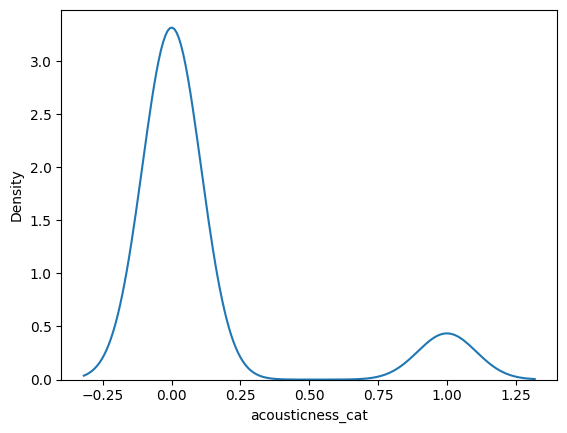

In [49]:
sns.kdeplot(df.acousticness_cat);

In [50]:
def artist_pop_cat (df):
    if df['artist_pop'] < 70:
        return 0
    else:
        return 1
df['artist_pop_cat'] = df.apply(artist_pop_cat, axis = 1)

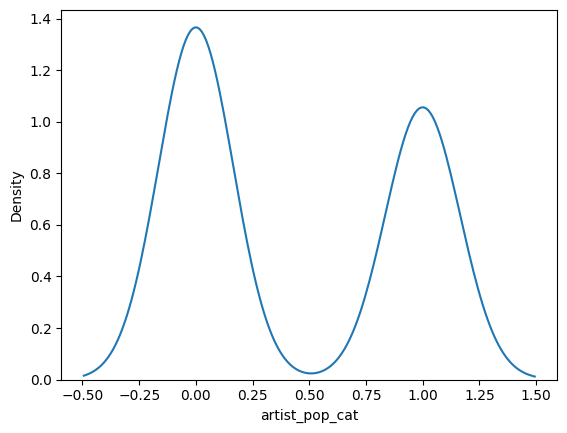

In [51]:
sns.kdeplot(df.artist_pop_cat);

Количество популярные и менее популярных артистов примерно на равне

In [52]:
def track_pop_cat (df):
    if df['artist_pop'] < 70:
        return 0
    else:
        return 1
df['track_pop_cat'] = df.apply(track_pop_cat, axis = 1)

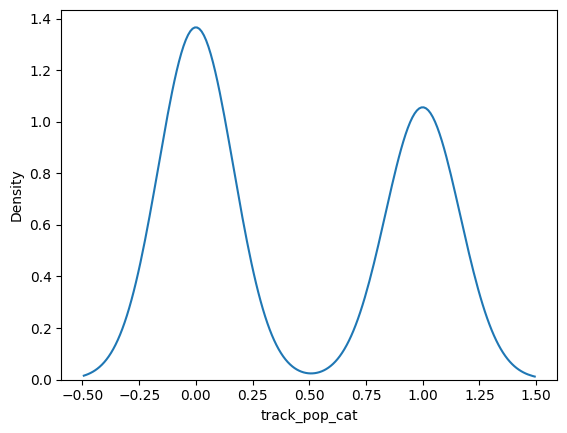

In [53]:
sns.kdeplot(df.track_pop_cat);

Количество популярные и менее популярных треков примерно на равне

In [54]:
cat = ['acousticness_cat', 'enrg_dance', 'artist_pop_cat', 'track_pop_cat']

for i in cat :
    df[i] = df[i].astype('category')

### Гипотеза 2. Популярность артиста не зависит от параметров песни, но зависит от ее популярности

In [55]:
top = df.query('artist_name == "Doja Cat" | artist_name == "Coopex" | artist_name == "Dame Dame" | artist_name == "Alex Alexander" | artist_name == "Farux"')


Популярность артиста не зависит от enrg_dance 


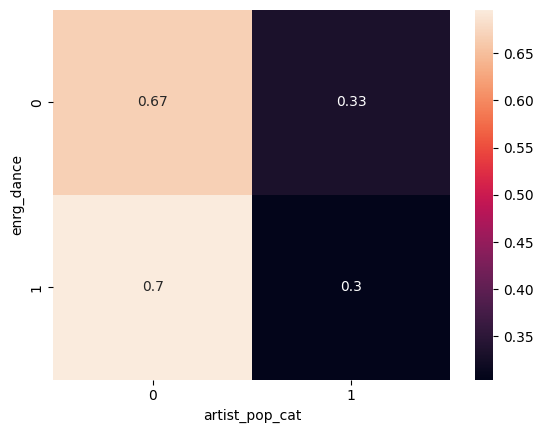

Популярность артиста не зависит от acousticness_cat 


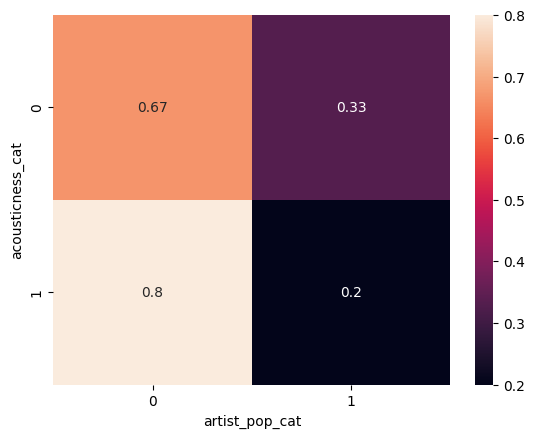

Популярность артиста зависит от track_pop_cat 


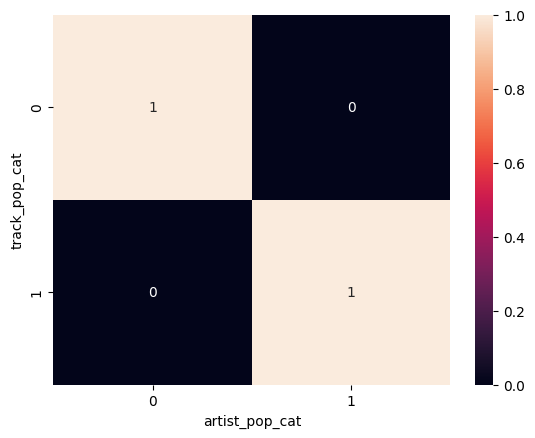

In [56]:
from scipy.stats import chi2_contingency
for i in top.select_dtypes(['category']).drop(columns=['artist_pop_cat']).columns:
    p =  (chi2_contingency(pd.crosstab(top[i], top['artist_pop_cat']))[1])
    if p < .001 :
        print('Популярность артиста зависит от {} '.format(i))
    else :
        print('Популярность артиста не зависит от {} '.format(i))

    contigency_pct = pd.crosstab(top[i], top['artist_pop_cat'], normalize='index')
    sns.heatmap(contigency_pct, annot=True)
    plt.show()

Гипотеза подтведилась, популярность артиста не зависит от параметов трека, но зависит от популярности артиста

### Гипотеза 3. Популярность трека зависит от его танцевальности, энергичности и популярности артиста
Для пользователей Тик Тока важна энергичность трека и возможность поставить под него вирусный танец, плюс важно, чтобы артист обладал хорошим рейтингом, чтобы музыка была вирусной и просмотры росли

In [57]:
def scatter(df, x, y, ax):
    
    sns.regplot(data=df, x=x, y=y, ax=ax, 
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

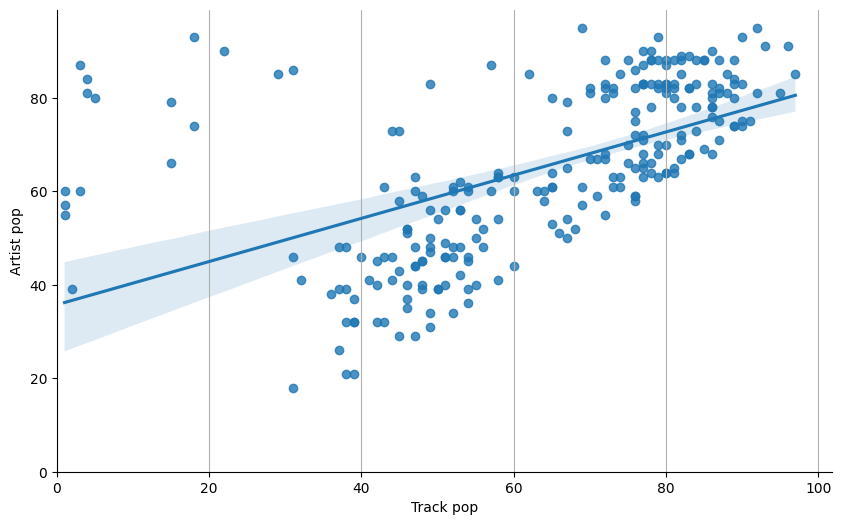

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

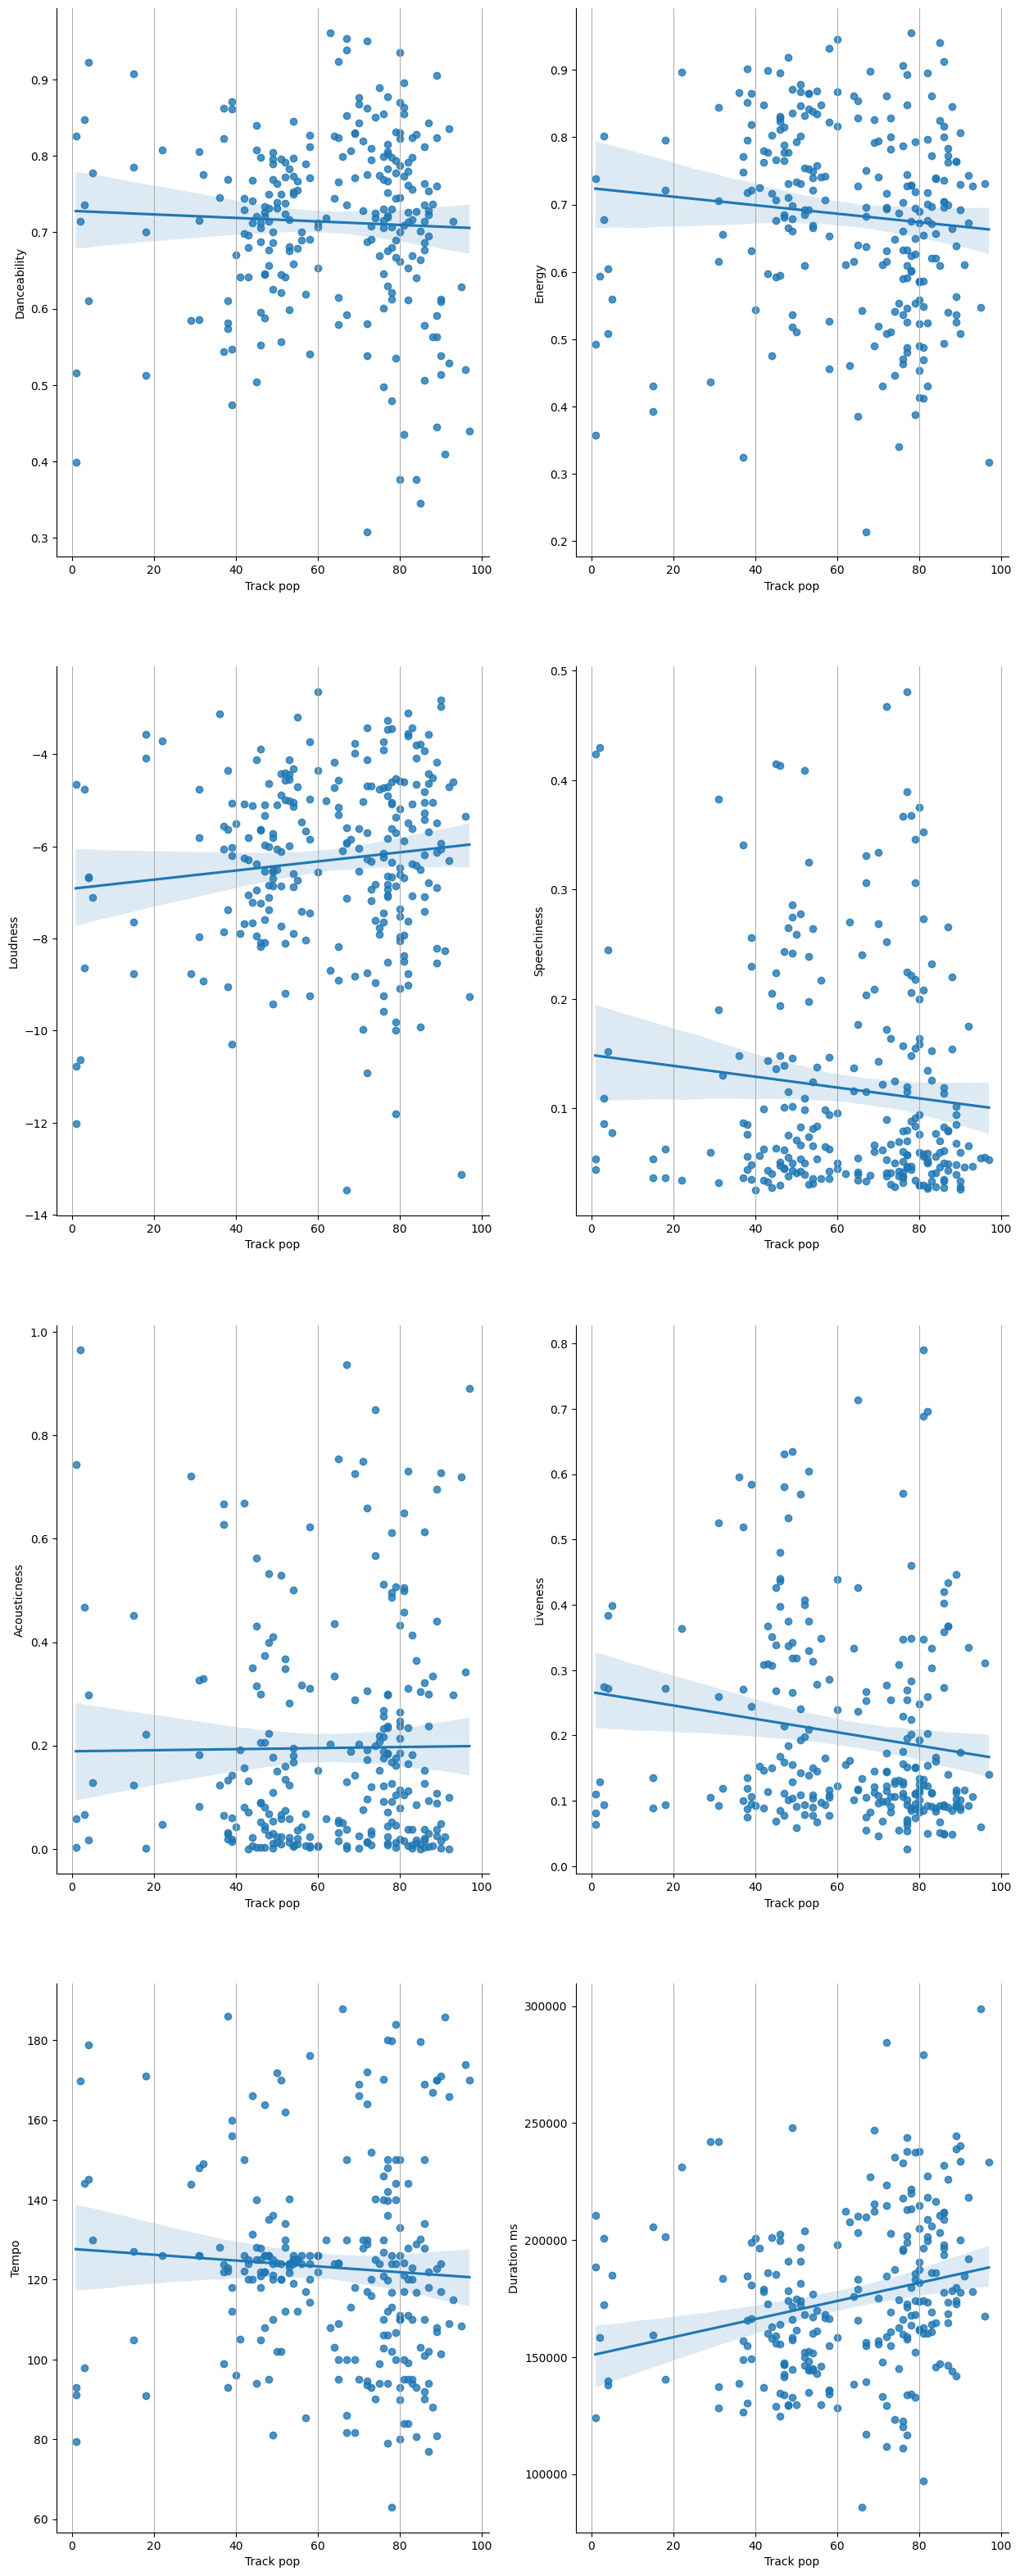

In [59]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
     'liveness', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'track_pop', col, ax)
    

plt.show()

Удивительные результаты, популярность трека напрямую зависит только от уровня артиста, возможно это связано с не точными данными.

## Общий вывод

1) 'Drake', 'The Weeknd', 'Harry Styles', 'Justin Bieber','Ed Sheeran' - самые прослушиваемые артисты 

    1.1 Их популярные альбомы: Dark Lane Demo Tapes, After Hours, As It Was, Justice, Bad Habits 
    
    1.2 Их популярне треки: Bad Habits, Toosie Slide, Peaches (feat. Daniel Caesar & Giveon), Blinding Lights, As It Was
    
2) Мы выяснили, что самые рейтенговые артисты, не являются самыми популярными на платформе Тикток. 

3) Doja Cat, Coopex, Dame Dame, Alex Alexander, Farux  - самые рейтенговые артисты на платформе Тикток
    
    3.1 Их популярные альбомы: Planet Her, On My Way, I Wanna Know, Work from Home, Hot Pink, DÁKITI, Only Girl, Boss Bitch, The Boss, Freak
    
    3.2 Их популярне треки: 'I Wanna Know', 'Leap of Faith', 'Ocean Eyes', 'Memories', 'Woman',
       'Paint It Black', 'Kiss Me More (feat. SZA)', 'The Hills',
       "You Don't Know Me", 'Counting Stars', 'Apologize', 'Need to Know',
       'Lies', "Ain't Shit", 'Work from Home', 'You Right',
       'When Hello Means Goodbye', 'Say It Right', 'Freak', 'The Boss',
       'Boss Bitch', 'Only Girl', 'On My Way', 'DÁKITI', 'Say So',
       'Let It Go'
       
4) Популярность артиста зависит от рейтинга его песен и наоборот

5) Популярность трека не зависит от параметров трека